In [1]:
import numpy as np
from catboost import CatBoostClassifier
import pandas as pd

In [4]:
# open dfs
bact_f = pd.read_table('proteobacteria-f_fitch_g-b.txt')
bact_g = pd.read_table('proteobacteria-g_fitch_g-b.txt')
fun = pd.read_table('fungi_fitch_g-b.txt')
euk = pd.read_table('eukaryota_fitch_g-b.txt')
archaea = pd.read_table('archaea_fitch_g-b.txt')

# merging the training set
frames = [archaea, fun, euk]
train = pd.concat(frames)
test = bact_f

# Create a list of the feature column's names
features = train.columns[1:-1]
X_train = train[features].as_matrix()
X_test = test[features].as_matrix()

y_train = train['division'] == 'good'
y_test = test['division'] == 'good'

In [5]:
# specify the training parameters 
model = CatBoostClassifier(iterations=50, depth=6, learning_rate=1, loss_function='Logloss', 
                           use_best_model=True, od_type = 'Iter')

In [6]:
#train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test))

0: learn: 0.3966365	test: 0.5322807	bestTest: 0.5322807 (0)	total: 327ms	remaining: 16s
1: learn: 0.3515412	test: 0.5140478	bestTest: 0.5140478 (1)	total: 597ms	remaining: 14.3s
2: learn: 0.334269	test: 0.5243978	bestTest: 0.5140478 (1)	total: 883ms	remaining: 13.8s
3: learn: 0.3221468	test: 0.5409369	bestTest: 0.5140478 (1)	total: 1.08s	remaining: 12.5s
4: learn: 0.3145352	test: 0.5474626	bestTest: 0.5140478 (1)	total: 1.27s	remaining: 11.4s
5: learn: 0.3015481	test: 0.528843	bestTest: 0.5140478 (1)	total: 1.45s	remaining: 10.6s
6: learn: 0.2918574	test: 0.5303868	bestTest: 0.5140478 (1)	total: 1.56s	remaining: 9.6s
7: learn: 0.2836233	test: 0.5336292	bestTest: 0.5140478 (1)	total: 1.68s	remaining: 8.82s
8: learn: 0.2735608	test: 0.5389729	bestTest: 0.5140478 (1)	total: 1.78s	remaining: 8.12s
9: learn: 0.2585288	test: 0.5722857	bestTest: 0.5140478 (1)	total: 1.88s	remaining: 7.51s
10: learn: 0.2479359	test: 0.564647	bestTest: 0.5140478 (1)	total: 1.99s	remaining: 7.07s
11: learn: 0.23

In [8]:
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)
preds_proba = pd.DataFrame(data=preds_proba)[1]
#print("class = ", preds_class)
#print("proba = ", preds_proba)


In [9]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [10]:
print f1_score(y_test, preds_class)

0.624113475177


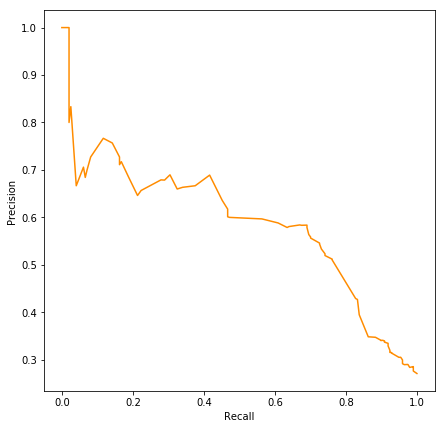

average precision score  0.581791892615


In [12]:
precision, recall, _ = precision_recall_curve(y_test, preds_proba)

plt.figure(figsize = (7, 7))
plt.plot(recall, precision, color = 'darkorange')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

print "average precision score ", average_precision_score(y_test, preds_proba)

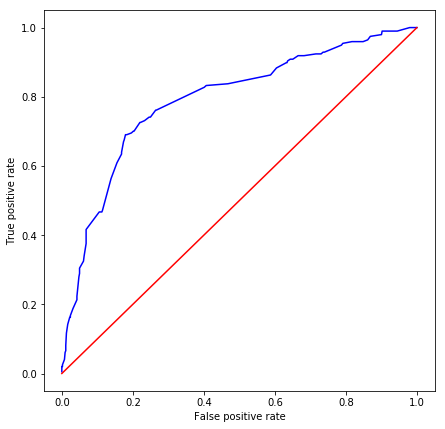

AUC:  0.79041444214


In [13]:
fpr, tpr, _ = roc_curve(y_test, preds_proba)

plt.figure(figsize = (7, 7))
plt.plot(fpr, tpr, color = 'blue')
plt.plot([0, 1], [0, 1], color = 'red')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

print "AUC: ", roc_auc_score(y_test, preds_proba)

In [15]:
y_test = pd.Series(data=y_test)
preds_proba = pd.Series(data=preds_proba)
comp = pd.concat([y_test, preds_proba], axis = 1)

,division,1
0,False,0.717616
1,True,0.732330
2,True,0.565350
3,False,0.137325
4,False,0.881831
5,False,0.046417
6,False,0.069269
7,False,0.005589
8,False,0.543150
9,True,0.953645


In [16]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, preds_class))
sns.heatmap(cm, annot=True)

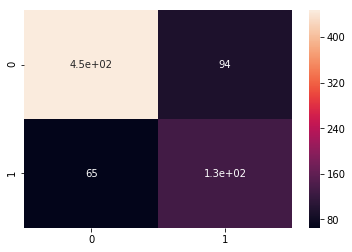

In [17]:
plt.show()

In [18]:
cm

,0,1
0,447,94
1,65,132
